In [2]:
import numpy as np 
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from keras_visualizer import visualizer
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import *
from keras.layers import BatchNormalization
import os

# load data

In [3]:
dataset_name = input('CK+ or FER or JAFFE: ').lower()
dataset_name

'jaffe'

In [6]:
if dataset_name == 'ck+':
    data_path = 'dataset/CK+48'
    data_dir_list = os.listdir(data_path)

    img_data_list=[]

    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(48,48))
            img_data_list.append(input_img_resize)
            
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data/255
    img_data.shape

elif dataset_name == 'fer':
    # data_path = 'dataset/fer'
    
    # for training
    data_path = 'dataset/fer2013/train'
    data_dir_list = os.listdir(data_path)

    labels = []
    img_data_list=[]
    img_class = 0

    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of train dataset-'+'{}'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(48,48))
            img_data_list.append(input_img_resize)
            labels.append(img_class)
        img_class += 1
            
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data/255
    X_train = img_data
    y_train = utils.to_categorical(labels, img_class)

    print()
    
    # for testing
    data_path = 'dataset/fer2013/test'
    data_dir_list = os.listdir(data_path)

    labels = []
    img_data_list=[]
    img_class = 0

    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of test dataset-'+'{}'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(48,48))
            img_data_list.append(input_img_resize)
            labels.append(img_class)
        img_class += 1
            
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data/255
    X_test = img_data
    y_test = utils.to_categorical(labels, img_class)

elif dataset_name=='jaffe':
    data_path = 'dataset/jaffedbase/jaffedbase'
    data_dir_list = os.listdir(data_path)

    names = ['happy', 'sad', 'surprise', 'angry', 'disgust', 'fear', 'neutral']
    labels = []
    img_data_list=[]

    img_list=os.listdir(data_path)
    print ('Loaded the images of dataset-'+'{}'.format(data_path))
    del img_list[0]
    del img_list[0]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        if 'AN' in img.split('.')[1]:
            labels.append(names.index('angry'))
        elif 'HA' in img.split('.')[1]:
            labels.append(names.index('happy'))
        elif 'SA' in img.split('.')[1]:
            labels.append(names.index('sad'))
        elif 'NE' in img.split('.')[1]:
            labels.append(names.index('neutral'))
        elif 'SU' in img.split('.')[1]:
            labels.append(names.index('surprise'))
        elif 'DI' in img.split('.')[1]:
            labels.append(names.index('disgust'))
        elif 'FE' in img.split('.')[1]:
            labels.append(names.index('fear'))
    # print(labels)
            
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data/255
    X = img_data
    Y = utils.to_categorical(labels, len(names))

else:
    print('incorrect input')

Loaded the images of dataset-dataset/jaffedbase/jaffedbase


# adding labels

In [7]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

if dataset_name == 'ck+':
    labels[0:45]=0      #45
    labels[46:63]=1     #18
    labels[64:122]=2    #59
    labels[123:147]=3   #25
    labels[148:216]=4   #69
    labels[217:244]=5   #28
    labels[245:327]=6   #83
    names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

elif dataset_name == 'fer':
    names = ['angry','disgust','fear','happy','neutral','sad','surprise']

def getLabel(id):
    return names[id]

# dividing into training and testing

In [8]:
if dataset_name == 'ck+':
    Y = utils.to_categorical(labels, num_classes)
    X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.30, shuffle=True, random_state=42)
elif dataset_name == 'jaffe':
    X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.30, shuffle=True, random_state=42)

# x_test = X_test
X_train = np.reshape(X_train, (X_train.shape[0], 48, 48, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 48, 48, 1))

print(X_train.shape)
print(X_test.shape)

(149, 48, 48, 1)
(64, 48, 48, 1)


# creating model

In [146]:
input_shape=(48,48,1)

model = Sequential()

model.add(Conv2D(4, (2, 2),input_shape=input_shape))
model.add(Conv2D(6, (2, 2), activation='relu', strides=(2,2)))
model.add(Conv2D(16, (4, 4), activation='relu'))
model.add(Conv2D(32, (4, 4), activation='relu', strides=(2,2)))
# model.add(Conv2D(12, (8, 8), input_shape=input_shape, padding='same', activation='relu', strides=(4,4)))
# # model.add(Conv2D(7, (2, 2), input_shape=input_shape, padding='same', activation='relu'))
# model.add(Conv2D(10, (1, 1), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
# model.add(Conv2D(64, (2, 2), padding='same', activation='relu', strides=(2,2)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (4, 4)))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(82, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation = 'softmax'))

model.summary()

# visualizer(model, format='png')

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 47, 47, 4)         20        
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 23, 23, 6)         102       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 20, 20, 16)        1552      
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 9, 9, 32)          8224      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)             

In [25]:
# input_shape=(48,48,1)

# model = Sequential()

# model.add(Conv2D(4, (1, 1), input_shape=input_shape, padding='same', activation='relu', strides=(2,2)))
# model.add(Conv2D(6, (2, 2), input_shape=input_shape, padding='same', activation='relu', strides=(2,2)))
# model.add(Conv2D(16, (4, 4), input_shape=input_shape, padding='same', activation='relu', strides=(2,2)))
# model.add(Conv2D(32, (8, 8), input_shape=input_shape, padding='same', activation='relu', strides=(3,3)))
# # model.add(Conv2D(12, (8, 8), input_shape=input_shape, padding='same', activation='relu', strides=(4,4)))
# # # model.add(Conv2D(7, (2, 2), input_shape=input_shape, padding='same', activation='relu'))
# # # model.add(Conv2D(10, (3, 3), padding='same', activation='relu', strides=(4,4)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
# # model.add(Conv2D(64, (2, 2), padding='same', activation='relu', strides=(2,2)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Activation('relu'))
# # model.add(Conv2D(64, (4, 4)))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(82, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(7, activation = 'softmax'))

# model.summary()

# # visualizer(model, format='png')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 4)         8         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 6)         102       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 16)          1552      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 32)          32800     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

# training the model

In [147]:
filename='model_train_new.csv'
filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
# callbacks = [checkpoint]


csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [148]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'MeanSquaredError'])

In [149]:
model_info = model.fit(X_train, y_train, batch_size=7, epochs=80, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/80
22/22 [==============================] - 1s 21ms/step - loss: 1.9872 - accuracy: 0.1208 - mean_squared_error: 0.1242 - val_loss: 1.9510 - val_accuracy: 0.1250 - val_mean_squared_error: 0.1227
Epoch 2/80
22/22 [==============================] - 0s 15ms/step - loss: 1.9469 - accuracy: 0.1745 - mean_squared_error: 0.1225 - val_loss: 1.9516 - val_accuracy: 0.1562 - val_mean_squared_error: 0.1227
Epoch 3/80
22/22 [==============================] - 0s 15ms/step - loss: 1.9364 - accuracy: 0.1678 - mean_squared_error: 0.1221 - val_loss: 1.9463 - val_accuracy: 0.2031 - val_mean_squared_error: 0.1225
Epoch 4/80
22/22 [==============================] - 0s 15ms/step - loss: 1.9293 - accuracy: 0.1946 - mean_squared_error: 0.1217 - val_loss: 1.9422 - val_accuracy: 0.1719 - val_mean_squared_error: 0.1223
Epoch 5/80
22/22 [==============================] - 0s 14ms/step - loss: 1.9289 - accuracy: 0.1074 - mean_squared_error: 0.1219 - val_loss: 1.9507 - val_accuracy: 0.0938 - val_mean_squared

In [832]:
model.save('my_model.hdf5')

# predict model

In [150]:
# evaluate the model
score = model.evaluate(X_train, y_train)
print('Accuracy (train): %.2f' % (score[1]*100))

score = model.evaluate(X_test, y_test)
print('Accuracy (test): %.2f' % (score[1]*100))

5/5 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - mean_squared_error: 6.8263e-06
Accuracy (train): 100.00
2/2 [==============================] - 0s 7ms/step - loss: 1.1873 - accuracy: 0.7812 - mean_squared_error: 0.0526
Accuracy (test): 78.12


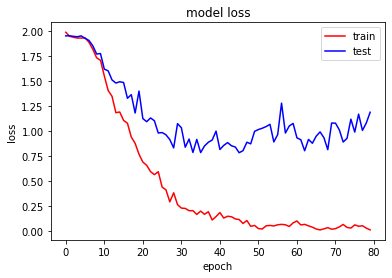

In [151]:
plt.plot(model_info.history['loss'], 'r', label='train')
plt.plot(model_info.history['val_loss'], 'b', label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

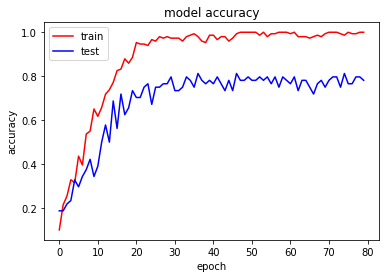

In [121]:
plt.plot(model_info.history['accuracy'], 'r', label='train')
plt.plot(model_info.history['val_accuracy'], 'b', label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

(1, 48, 48, 1)
[[3.1789169e-01 2.2301871e-04 4.9910180e-02 5.3439517e-02 1.0160844e-05
  4.4453394e-01 1.3399154e-01]]
[5]
[[0. 0. 0. 0. 1. 0. 0.]]


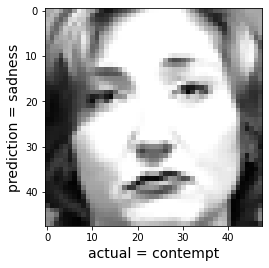

In [158]:
test_image = X_test[5:6]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[33:34])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.xlabel('actual = %s' % getLabel(1 in y_test[33:34]), fontsize=14)

plt.show()

(1, 48, 48, 1)
[[1.9234123e-18 2.7056869e-26 6.0990000e-22 1.4475825e-17 1.4602935e-26
  5.4330467e-17 1.0000000e+00]]
[6]
[[0. 0. 0. 0. 1. 0. 0.]]


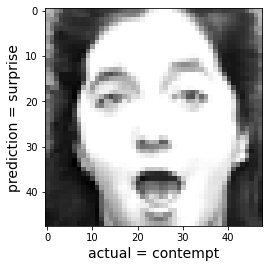

In [155]:
test_image = X_test[2:3]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[33:34])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.xlabel('actual = %s' % getLabel(1 in y_test[33:34]), fontsize=14)

plt.show()

(1, 48, 48, 1)
[[3.5840484e-01 1.4368009e-06 1.1701441e-01 2.5785744e-02 4.0876034e-06
  9.0854301e-04 4.9788091e-01]]
[6]
[[0. 0. 0. 0. 1. 0. 0.]]


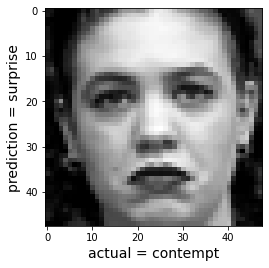

In [157]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(np.argmax(model.predict(test_image), axis=-1))
print(y_test[33:34])

plt.imshow(test_image[0],cmap=plt.get_cmap('gray'))
plt.ylabel('prediction = %s' % getLabel(np.argmax(model.predict(test_image), axis=-1)[0]), fontsize=14)
plt.xlabel('actual = %s' % getLabel(1 in y_test[33:34]), fontsize=14)

plt.show()